In [97]:
import nltk
import string
import pandas as pd
import nlp_utils as nu
import matplotlib.pyplot as plt
# Loading necessary libraries
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [98]:
dialogs = []

# Explicitly specify the correct encoding (e.g., 'utf-8')
with open('../data/hrchat.txt', 'r', encoding='utf-8') as file:
    for line in file:
        if ': ' in line:
            try:
                dialogue = line.split(': ')[1].rstrip('\n')
                dialogs.append(dialogue)
            except IndexError:
                print('Error extracting dialogue from line:', line)
        else:
            print('Skipped line without expected format:', line)

print(len(dialogs))
print(dialogs)


Skipped line without expected format: 

Skipped line without expected format: Chatbot:

1575
["Hey there! How's it going? I'm here to chat and listen if you'd like to share anything about your job or anything else on your mind.", "Hi! Thanks for reaching out. Everything's been okay lately, I guess.", "That's good to hear! How do you feel about your current job? Are you pretty satisfied with what you're doing?", "Yeah, it's alright. I mean, I like the work, but sometimes the hours can be long.", 'I see. Long hours can definitely take a toll. Is work-life balance something you think about often?', "Yeah, for sure. I've been thinking about it more lately, especially with trying to pursue my interests outside of work.", "Totally understandable. It's important to have time for yourself and your passions. What are some of your dreams or goals, both in your career and personally?", "Well, I've been hoping to advance in my career and maybe even switch fields eventually. Also, I'd love to trave

In [99]:
import pandas as pd

# Assuming 'data/human_chat.txt' is the path to your file
file_path = '../data/hrchat.txt'

# Read the file and create a list of tuples (query, response)
dialogs = []
with open(file_path, 'r', encoding='utf-8') as file:
    current_dialog = []
    for line in file:
        if line.startswith("Chatbot:"):
            current_dialog = [line.split(":")[1].strip()]
            # print(current_dialog)
        elif line.startswith("Employee:"):
            current_dialog.append(line.split(":")[1].strip())
            dialogs.append(tuple(current_dialog))

# Create a DataFrame from the list of tuples
df = pd.DataFrame(dialogs, columns=['Query', 'Response'])

# Display the DataFrame
print(df)


                                                Query  \
0   Hey there! How's it going? I'm here to chat an...   
1   That's good to hear! How do you feel about you...   
2   I see. Long hours can definitely take a toll. ...   
3   Totally understandable. It's important to have...   
4   Those sound like fantastic goals! What steps d...   
5   I get that. It can be challenging to navigate ...   
6   It's important to feel valued for the work you...   
7   I understand. It can be daunting to have those...   
8   Managing finances and saving for big purchases...   
9   Definitely. It's important to weigh your optio...   
10                   Hey there! How's your day going?   
11  Awesome! Say, how satisfied are you with your ...   
12  I see. Do you feel your compensation accuratel...   
13  That sounds frustrating. Let's talk about some...   
14  Understandable. Are there any housing concerns...   
15  Buying a home is a big step indeed. Do you hav...   
16  No worries! It's never too 

In [100]:
df.shape

(42, 2)

In [101]:
df.columns

Index(['Query', 'Response'], dtype='object')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Query     42 non-null     object
 1   Response  42 non-null     object
dtypes: object(2)
memory usage: 800.0+ bytes


In [103]:
df.describe()


,Query,Response
count,42,42
unique,42,42
top,Hey there! How's it going? I'm here to chat an...,Hi! Thanks for reaching out. Everything's been...
freq,1,1


In [104]:
df.nunique()

Query       42
Response    42
dtype: int64

In [105]:
df.isnull().sum()

Query       0
Response    0
dtype: int64

In [106]:
Text=df['Query']

In [107]:
sid = SentimentIntensityAnalyzer()
for sentence in Text:
    print(sentence)

    ss = sid.polarity_scores(sentence)
    for k in ss:
        print('{0}: {1}, ' .format(k, ss[k]), end='')
    print()

Hey there! How's it going? I'm here to chat and listen if you'd like to share anything about your job or anything else on your mind.
neg: 0.0, neu: 0.828, pos: 0.172, compound: 0.6114, 
That's good to hear! How do you feel about your current job? Are you pretty satisfied with what you're doing?
neg: 0.0, neu: 0.64, pos: 0.36, compound: 0.8608, 
I see. Long hours can definitely take a toll. Is work-life balance something you think about often?
neg: 0.0, neu: 0.838, pos: 0.162, compound: 0.4019, 
Totally understandable. It's important to have time for yourself and your passions. What are some of your dreams or goals, both in your career and personally?
neg: 0.0, neu: 0.743, pos: 0.257, compound: 0.7884, 
Those sound like fantastic goals! What steps do you think you need to take to achieve them?
neg: 0.0, neu: 0.701, pos: 0.299, compound: 0.75, 
I get that. It can be challenging to navigate career paths and personal aspirations. How do you feel about your current salary and benefits packa

In [108]:
analyzer = SentimentIntensityAnalyzer()
df['rating'] = Text.apply(analyzer.polarity_scores)
df=pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)
### Creating a dataframe.
df

,Query,Response,neg,neu,pos,compound
0,Hey there! How's it going? I'm here to chat an...,Hi! Thanks for reaching out. Everything's been...,0.000,0.828,0.172,0.6114
1,That's good to hear! How do you feel about you...,"Yeah, it's alright. I mean, I like the work, b...",0.000,0.640,0.360,0.8608
2,I see. Long hours can definitely take a toll. ...,"Yeah, for sure. I've been thinking about it mo...",0.000,0.838,0.162,0.4019
3,Totally understandable. It's important to have...,"Well, I've been hoping to advance in my career...",0.000,0.743,0.257,0.7884
4,Those sound like fantastic goals! What steps d...,I've been trying to learn new skills and netwo...,0.000,0.701,0.299,0.7500
5,I get that. It can be challenging to navigate ...,"Honestly, it could be better. I feel like I'm ...",0.000,0.840,0.160,0.4939
6,It's important to feel valued for the work you...,"Not yet, but I've been thinking about it. It's...",0.000,0.739,0.261,0.6908
7,I understand. It can be daunting to have those...,"Well, money's always on my mind, especially wi...",0.000,0.902,0.098,0.3612
8,Managing finances and saving for big purchases...,"Yeah, I've been doing some research, but it's ...",0.000,0.768,0.232,0.7876
9,Definitely. It's important to weigh your optio...,"Thanks, I appreciate that. It's nice to have s...",0.000,0.870,0.130,0.5423


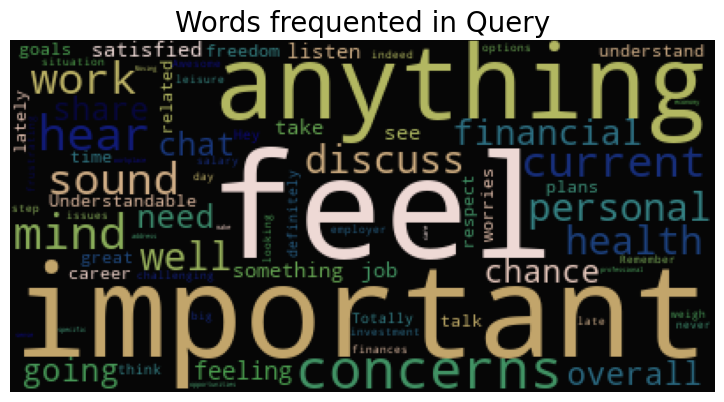

In [109]:
from wordcloud import WordCloud
def wordcloud(df, label):

    subset=df[df[label]==1]
    text=df.Query.values
    wc= WordCloud(background_color="black",max_words=1000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
# visualising wordcloud

wordcloud(df,'Query')
# top words in the query column

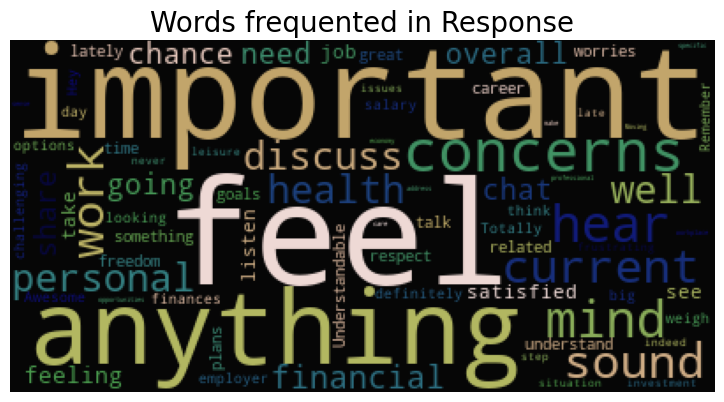

In [110]:
wordcloud(df,'Response')
# top words in the response column

In [111]:
import re
# importing regular expressions
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
# Lower case conversion
remove_n = lambda x: re.sub("\n", " ", x)
# removing \n and replacing them with empty value

In [112]:
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
# removing non ascii characters

In [113]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
# removing alpha numeric values

In [114]:
df['Query'] = df['Query'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
# using map function and applying the function on query column

In [115]:
df['Response'] = df['Response'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
# using map function and applying the function on response column

In [116]:
df
# final cleaned dataset

,Query,Response,neg,neu,pos,compound
0,hey there how s it going i m here to chat an...,hi thanks for reaching out everything s been...,0.000,0.828,0.172,0.6114
1,that s good to hear how do you feel about you...,yeah it s alright i mean i like the work b...,0.000,0.640,0.360,0.8608
2,i see long hours can definitely take a toll ...,yeah for sure i ve been thinking about it mo...,0.000,0.838,0.162,0.4019
3,totally understandable it s important to have...,well i ve been hoping to advance in my career...,0.000,0.743,0.257,0.7884
4,those sound like fantastic goals what steps d...,i ve been trying to learn new skills and netwo...,0.000,0.701,0.299,0.7500
5,i get that it can be challenging to navigate ...,honestly it could be better i feel like i m ...,0.000,0.840,0.160,0.4939
6,it s important to feel valued for the work you...,not yet but i ve been thinking about it it s...,0.000,0.739,0.261,0.6908
7,i understand it can be daunting to have those...,well money s always on my mind especially wi...,0.000,0.902,0.098,0.3612
8,managing finances and saving for big purchases...,yeah i ve been doing some research but it s ...,0.000,0.768,0.232,0.7876
9,definitely it s important to weigh your optio...,thanks i appreciate that it s nice to have s...,0.000,0.870,0.130,0.5423


In [117]:
pd.set_option('display.max_rows',3800)
# Displaying all rows in the dataset

In [118]:
imp_sent=df.sort_values(by='compound', ascending=False)
# arranging the compound column in descending order to find the best sentence.

In [119]:
imp_sent.head(5)
# printing the first 5 rows

,Query,Response,neg,neu,pos,compound
19,awesome what do you enjoy doing in your free ...,i love hiking and spending time outdoors whene...,0.0,0.412,0.588,0.9359
40,that s wonderful to hear feeling empowered to...,more flexibility in my work schedule would be ...,0.0,0.652,0.348,0.9169
41,flexibility can indeed contribute to a greater...,not yet but it s something i ve been consider...,0.0,0.552,0.448,0.9001
33,i hear you it s important to feel comfortable...,more open communication and consideration for ...,0.0,0.673,0.327,0.8658
1,that s good to hear how do you feel about you...,yeah it s alright i mean i like the work b...,0.0,0.640,0.360,0.8608


In [120]:
pos_sent=df.sort_values(by='pos', ascending=False)
# Arranging the dataframe by positive column in descending order to find the best postive sentence.
pos_sent.head(5)
# printing the first 5 rows

,Query,Response,neg,neu,pos,compound
19,awesome what do you enjoy doing in your free ...,i love hiking and spending time outdoors whene...,0.0,0.412,0.588,0.9359
11,awesome say how satisfied are you with your ...,well i think it s okay but i ve been feeling...,0.0,0.527,0.473,0.8016
41,flexibility can indeed contribute to a greater...,not yet but it s something i ve been consider...,0.0,0.552,0.448,0.9001
18,that s great to hear do you feel you have ade...,yeah i think so i ve got a good routine going,0.0,0.609,0.391,0.8398
21,that sounds amazing are you satisfied with yo...,i m pretty content but i wouldn t mind explor...,0.0,0.628,0.372,0.8588


In [121]:
neg_sent=df.sort_values(by='neg', ascending=False)
# Arranging the dataframe by negative column in descending order to find the best negative sentence.

In [122]:
neg_sent.head(5)
# printing the first 5 rows

,Query,Response,neg,neu,pos,compound
26,are there any stressors or worries on your min...,nothing major just the usual ups and downs of...,0.289,0.588,0.123,-0.5267
16,no worries it s never too late to start are ...,actually yeah i m not sure where to begin or...,0.243,0.642,0.115,-0.4199
35,understandable economic uncertainty can be st...,mainly concerns about job stability and retire...,0.241,0.759,0.000,-0.6908
13,that sounds frustrating let s talk about some...,it s alright but rent keeps going up and it ...,0.172,0.828,0.000,-0.4404
17,i totally get that how s your health been lat...,health wise i m doing alright just trying to...,0.128,0.640,0.231,0.3094


In [123]:
neu_sent=df.sort_values(by='neu', ascending=False)
# Arranging the dataframe by negative column in descending order to find the best neutral sentence.

In [124]:
neu_sent.head(5)
# printing the first 5 rows

,Query,Response,neg,neu,pos,compound
10,hey there how s your day going,hi it s been alright thanks for asking,0.0,1.0,0.0,0.0
30,i m here to listen what s been on your mind,well for one i feel like there s a lack of r...,0.0,1.0,0.0,0.0
28,hello how s your day going,hi there it s going alright thank you,0.0,1.0,0.0,0.0
37,it s never too late to revisit your financial ...,it s been alright but i ve been feeling more ...,0.0,1.0,0.0,0.0
12,i see do you feel your compensation accuratel...,not entirely i ve been putting in extra hours...,0.0,1.0,0.0,0.0


In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer
# importing tfidf vectorizer
tfidf = TfidfVectorizer()
# Word Embedding - TF-IDF
factors = tfidf.fit_transform(df['Query']).toarray()
# changing column into array

In [126]:
from sklearn.metrics.pairwise import cosine_distances
from nltk.stem import WordNetLemmatizer
import nltk

# Download the WordNet resource
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chama\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [127]:
lemmatizer = WordNetLemmatizer()

query = 'who are you ?'
def chatbot(query):
    # step:-1 clean
    query = lemmatizer.lemmatize(query)
    # step:-2 word embedding - transform
    query_vector = tfidf.transform([query]).toarray()
    # step-3: cosine similarity
    similar_score = 1 -cosine_distances(factors,query_vector)
    index = similar_score.argmax() # take max index position
    # searching or matching question
    matching_question = df.loc[index]['Query']
    response = df.loc[index]['Response']
    pos_score = df.loc[index]['pos']
    neg_score = df.loc[index]['neg']
    neu_score = df.loc[index]['neu']
    confidence = similar_score[index][0]
    chat_dict = {'match':matching_question,
                 'response':response,
                 'score':confidence,
                 'pos':pos_score,
                 'neg':neg_score,
                 'neu':neu_score}
    return chat_dict

In [128]:
#Sample
query = "Hi! Thanks for reaching out. Everything's been okay lately, I guess."
response = chatbot(query)
print(response)

{'match': 'i totally get that  how s your health been lately  are there any health related worries you d like to share ', 'response': 'health wise  i m doing alright  just trying to stay active and eat healthy ', 'score': 0.24902751239758902, 'pos': 0.231, 'neg': 0.128, 'neu': 0.64}
